# Understanding unemployment in France 

Have you ever wondered where the numbers came from when politicians or the media talk about unemployment ? Being a subject of interest in Western countries, let's try to understand what is happening in terms of unemployment in France. For this, we have retrieved data from [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). 
They represent unemployment data in France in 2017.



## Description of the dataset 

Have a look at the description of the dataset <a href="https://www.insee.fr/fr/statistiques/3555153#documentation" target="_blank">here</a>

* Import useful libraries
  * pandas 
  * numpy
  * matplotlib 

In [ ]:
!pip install matplotlib==3.4

#restart runtime !!!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Load the data from fdeec17.csv

In [2]:
url= 'https://julie-2-next-resources-dev.s3.eu-west-3.amazonaws.com/FULL_STACK_24_WEEK_PROGRAM/M03-Exploratory_Data_Analysis/D04-Distributions_and_Matplotlib/fdeec17.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,SEXE,ACTEU,ACTEU6,ACTIF,ACTOP,AIDFAM,ANCCHOM,ANCINACT,CONTACT,CREACCP,DEM,DISPOC,GARDEB,HALOR,INSCONT,MRA,MRB,MRBBIS,MRC,MRD,MRDBIS,MRE,MREC,MRF,MRG,MRGBIS,MRH,MRI,MRJ,...,NAFG088UN,PUB3FP,QPRC,STC,CONTRA,RDET,STAT2,STATOEP,STATUT,STATUTR,TITC,CSTMN,CSTPLC,DISPPLC,DUHAB,GARDEA,HHC6,HORAIC,RAISON,RAISTP,STMN,STPLC,TPPRED,TXTPPRED,ANCENTR4,SITANT,AAC,CSA,NAFANT,NAFANTG004,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,1.0,2,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,3.0,4.0,3.0,1.0,NaN,2.0,45.0,35.0,5.0,NaN,NaN,NaN,NaN,6.0,NaN,4.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,1.0,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,4.0,1.0,3.0,2.0,2.0,2.0,33.0,33.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,3.0,2.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,1.0,2,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,4.0,3.0,3.0,1.0,NaN,2.0,35.0,35.0,5.0,NaN,NaN,NaN,NaN,6.0,NaN,4.0,2.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,1.0,2,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,3.0,4.0,3.0,1.0,NaN,2.0,45.0,35.0,5.0,NaN,NaN,NaN,NaN,6.0,NaN,4.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,1.0,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,4.0,1.0,3.0,2.0,2.0,2.0,33.0,33.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,3.0,2.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428637,428637,2017,2,1,2,3,50,50,1,2,1.0,2,3.0,6.0,2.0,2.0,2.0,NaN,7.0,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,56.0,88.0,EV,71.0,75.0,234080,27.451625,0.0,NaN,NaN,NaN,NaN,NaN
428638,428638,2017,3,1,2,3,50,60,1,2,1.0,1,3.0,6.0,2.0,2.0,2.0,NaN,7.0,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,86.0,EV,33.0,75.0,234081,24.287870,NaN,NaN,NaN,NaN,NaN,NaN
428639,428639,2017,3,1,2,3,50,50,1,2,1.0,2,3.0,6.0,2.0,2.0,2.0,NaN,7.0,NaN,NaN,0.0,NaN,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,56.0,88.0,EV,71.0,75.0,234081,24.287870,NaN,NaN,NaN,NaN,NaN,NaN
428640,428640,2017,4,1,2,3,50,60,1,2,1.0,1,3.0,6.0,2.0,2.0,2.0,NaN,7.0,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,86.0,EV,33.0,75.0,234082,19.596248,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#On vérifie s'il y a des valeurs vides
df.ACTEU.isna().sum()/len(df)

0.0028088708059406217

In [14]:
#remplacement des valeurs manquantes
df.fillna({x:0 for x in df[['ACTEU']]}, inplace=True)
#recodification des valeurs
df['status'] = ['unknown' if x == 0 else 'actif' if x == 1 else 'chomeur' if x== 2 else 'inactif' for x in df.ACTEU]

df['status'].value_counts().to_frame(name='#people').reset_index()

,index,#people
0,inactif,207520
1,actif,198054
2,chomeur,21864
3,unknown,1204


In [15]:
sums = df['status'].value_counts().to_frame(name='#people').reset_index()['#people']
sums

0    207520
1    198054
2     21864
3      1204
Name: #people, dtype: int64

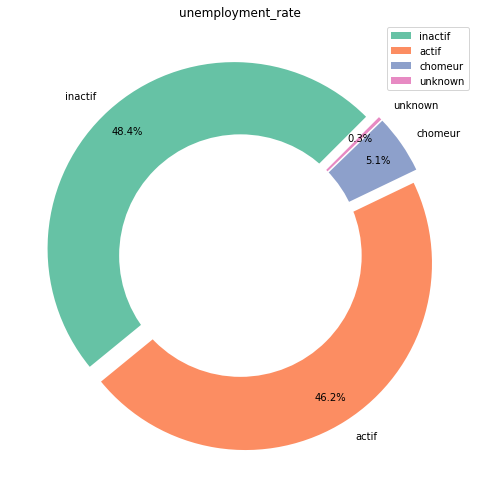

In [16]:
# Pie chart
plt.figure(figsize=(15, 7))

sums = df['status'].value_counts(normalize=True).values
names = df['status'].value_counts(normalize=True).index
#colors
colors =  ['#66C2A5', '#FC8D62', '#8DA0CB',
           '#E78AC3']
#explosion
explode = (0.05,0.05,0.05,0.05,)

plt.pie(sums
         , labels=names
         , colors = colors
         , autopct='%1.1f%%'
         , startangle=45
         , pctdistance=0.85
         , explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend()
plt.title('unemployment_rate')
plt.tight_layout()
plt.show();

* By doing a <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html" target="_blank">pie-chart</a>, show the share of unemployed, inactive and employed persons in France (from the variable ```ACTEU```).

Here you have some steps:
- Create a variable wich is the ```ACTEU```
- Convert this variable to qualitative values <a href="https://www.insee.fr/fr/statistiques/3555153#documentation" target="_blank">(refer to the doc)</a>
- Then do the pie chart with these informations:

  * The percentage of each category 
  * A legend 

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


Inactive      207520
Active        198054
Unemployed     21864
Unknow          1204
Name: ACTEU, dtype: int64

* Make the same graph on the variable ```ACTEU6``` which is more precise on the type of actives.

Remember:

You have to convert quantitatives values to quanlitatives

In [17]:
'''
Vide Sans objet (ACTEU non renseigné, individus de 15 ans et plus nécessairement non pondérés)
1 Actif occupé
3 Chômeur PSERE (Population sans Emploi à la Recherche d'un Emploi)
4 Autre chômeur BIT
5 Etudiant, élève, stagiaire en formation (inactifs)
6 Autres inactifs (dont retraités)

'''

#remplacement des valeurs manquantes
df.fillna({x:0 for x in df[['ACTEU6']]}, inplace=True)
#recodification des valeurs
df['status2'] = ['unknown' if x == 0 else 'actif_occupé' if x == 1 else 'chomeur_psere' if x== 3 else 'autre_chomeur_bit' if x== 4 else 'etudiant' if x== 5 else'autres_inactif' for x in df.ACTEU6]

df['status2'].value_counts().to_frame(name='#people_2').reset_index()

,index,#people_2
0,actif_occupé,198054
1,autres_inactif,172921
2,etudiant,34599
3,chomeur_psere,20854
4,unknown,1204
5,autre_chomeur_bit,1010


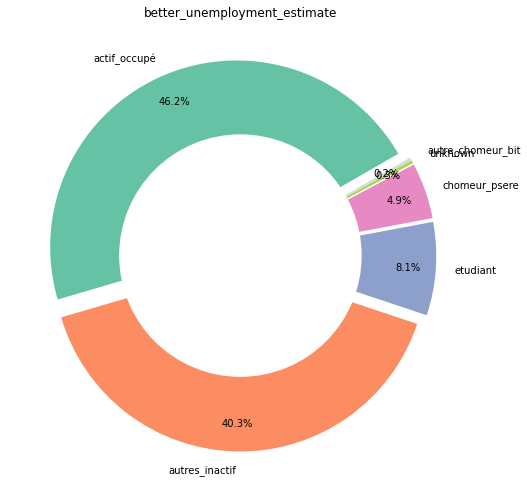

In [18]:
# Pie chart
plt.figure(figsize=(15, 7))

sums = df['status2'].value_counts(normalize=True).values
names = df['status2'].value_counts(normalize=True).index
#colors
colors =  ['#66C2A5', '#FC8D62', '#8DA0CB',
           '#E78AC3', '#A6D854', '#D9D9D9']
#explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,)

plt.pie(sums
         , labels=names
         , colors = colors
         , autopct='%1.1f%%'
         , startangle=30
         , pctdistance=0.85
         , explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# plt.legend()
plt.title('better_unemployment_estimate')
plt.tight_layout()
plt.show();

* By ploting a <a href="https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html" target="_blank">stacked bar chart</a>, compare :

  * The ratio *Unemployed* / *Actives* 
  * The ratio *Unemployed* / *Actives + Inactives*

In [19]:
df.status2.value_counts()

actif_occupé         198054
autres_inactif       172921
etudiant              34599
chomeur_psere         20854
unknown                1204
autre_chomeur_bit      1010
Name: status2, dtype: int64

In [20]:
s3= {'actif_occupé' : 'actives',
     'autres_inactif' : 'inactives',
     'etudiant' : 'inactives',
     'chomeur_psere': 'unemployed',
     'unknown' : 'inactives',
     'autre_chomeur_bit' : 'unemployed' 
  }
df['unemployment'] = df.status2.map(s3)
df['unemployment'].value_counts()

inactives     208724
actives       198054
unemployed     21864
Name: unemployment, dtype: int64

In [21]:
# Ratio unemployed / actives: r1
r1 = (df['unemployment'] == 'unemployed').sum() /(df['unemployment']=='actives').sum()
print('Ratio unemployed / actives r1 = ', r1)

Ratio unemployed / actives r1 =  0.11039413493289708


In [22]:
# Ratio unemployed / actives + inactives: r2
r2 = (df['unemployment'] == 'unemployed').sum() / (df['unemployment'] != 'unemployed').sum()
print('Ratio unemployed / actives + inactives: r2 = ',r2)

Ratio unemployed / actives + inactives: r2 =  0.05374921947597953


In [96]:
dataset = pd.DataFrame({
    
    'employed': [1-r1, 1-r2],
    'unemployed': [r1,r2],
})
dataset.index = ['unemployed / actives','unemployed / actives + inactives']
dataset

,employed,unemployed
unemployed / actives,0.889606,0.110394
unemployed / actives + inactives,0.946251,0.053749


Avec des barres horizontales

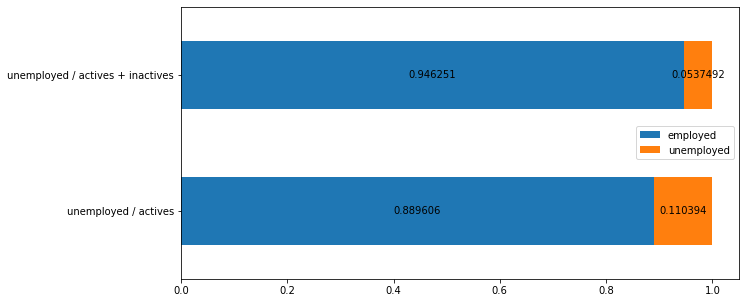

In [99]:

ax = dataset.plot(stacked=True, kind='barh', figsize=(10, 5), )
for c in ax.containers:
    ax.bar_label(c, label_type='center')



Avec ds barres verticales

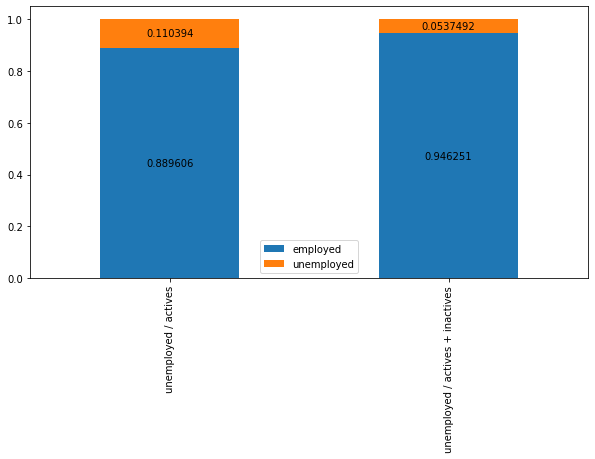

In [101]:

ax = dataset.plot.bar(stacked=True, figsize=(10, 5))
for c in ax.containers:
    ax.bar_label(c, label_type='center')

* By creating a <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html" target="_blank">bar chart</a> again, this time look at the distribution of unemployment seniority. The variable's name is ```ANCCHOM```

In [10]:
trad = {1:'<1', 2:'[1,3]', 
              3:'[3,6]',
               4:'[6,12]', 5:'[12, 18 mois]',
               6:'[18,24]', 7:'[24,36]',
               8:'>36', np.NAN:'unknown'}
df['seniority'] = df.ANCCHOM.map(trad)
df['seniority'].value_counts()

unknown          406904
>36                3906
[6,12]             3648
[12, 18 mois]      3398
[1,3]              3270
[3,6]              3193
[24,36]            2289
[18,24]            1132
<1                  902
Name: seniority, dtype: int64

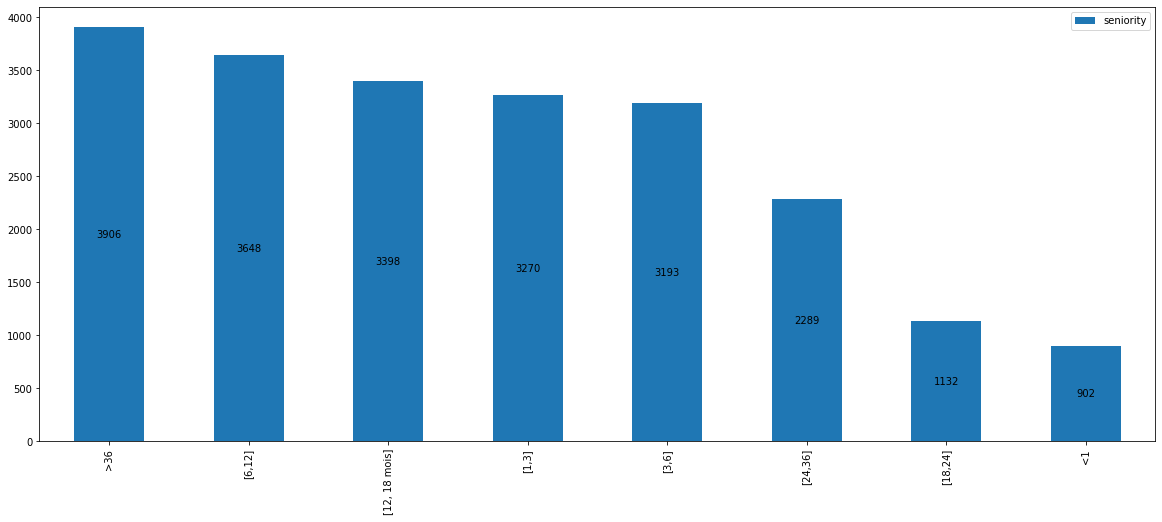

In [12]:
d2 = pd.DataFrame(df['seniority'].value_counts())
d2 = d2.iloc[1:]

ax = d2.plot(kind='bar', figsize=(20,8))
for c in ax.containers:
    ax.bar_label(c, label_type='center')


* The distribution doesn't look good on the bar chart, try doing it again on a piechart. 

In [243]:
d3 = pd.DataFrame(df.seniority.value_counts())
d3.drop(['unknown'],inplace=True)
d3.reset_index(inplace=True)
d3.rename(columns={'index':'lib'}, inplace=True)
d3['lib2'] = d3['lib']
d3.set_index('lib')

def calc(x,z):
   return z + ' : ' + str(round(x/d3.seniority.sum() * 100))+ '%'

d3['lib2'] = d3.apply(lambda x:calc(x['seniority'], x['lib2']),axis=1)
d3

,lib,seniority,lib2
0,>36,3906,>36 : 18%
1,"[6,12]",3648,"[6,12] : 17%"
2,"[12, 18 mois]",3398,"[12, 18 mois] : 16%"
3,"[1,3]",3270,"[1,3] : 15%"
4,"[3,6]",3193,"[3,6] : 15%"
5,"[24,36]",2289,"[24,36] : 11%"
6,"[18,24]",1132,"[18,24] : 5%"
7,<1,902,<1 : 4%


In [209]:
d3.seniority.sum()

21738

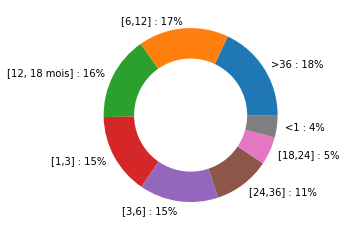

In [245]:
ax = plt.pie(d3.seniority,labels=d3.lib2)
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

* It would be interesting to see the distribution of people registered with Pôle Emploi or an employment agency among these unemployed people. Look at this distribution thanks to the CONTACT column 
  * Directly remove the NaN from your chart

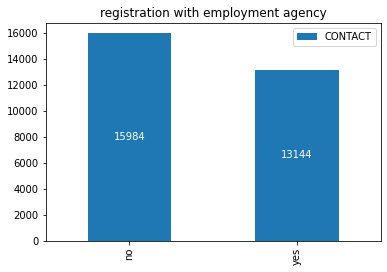

In [290]:
contacts = df.CONTACT.copy()
contacts.dropna(axis=0, inplace=True)
contacts = contacts.map({2:'no', 1:'yes'})
temp = pd.DataFrame(contacts.value_counts())
ax = temp.plot(kind='bar')
plt.title('registration with employment agency')
for c in ax.containers:
    ax.bar_label(c, label_type='center', color='white');

* Let's take a look at what pushes French people to change jobs. Through the ```CREACCP``` feature, create a horizontal bar chart that will allow you to know the main reasons why French people change jobs.

In [297]:
reason = df['CREACCP']
reason.dropna(inplace=True, axis=0)
eq = {
    
1: 'perte imminente',
2 : 'meilleur job',
3 :'cdi',
4 : 'travailler +',
5 : '+souple',
6 : '+sain',
7 :'+salaire',
8 :' -déplacements',
9 :'bouge',
10 :'entrepreneur',
11 :'changement',
12 :'invivable',
13 :'autre'
}
reason = reason.map(eq)

In [298]:
reason.value_counts()

+salaire           6775
meilleur job       2779
cdi                2462
+sain              1820
perte imminente    1582
travailler +       1404
changement         1392
invivable          1223
+souple            1102
autre               894
 -déplacements      598
entrepreneur        354
bouge               216
Name: CREACCP, dtype: int64

In [301]:
reason.head()

56                cdi
58      -déplacements
71       meilleur job
120      meilleur job
121        changement
Name: CREACCP, dtype: object

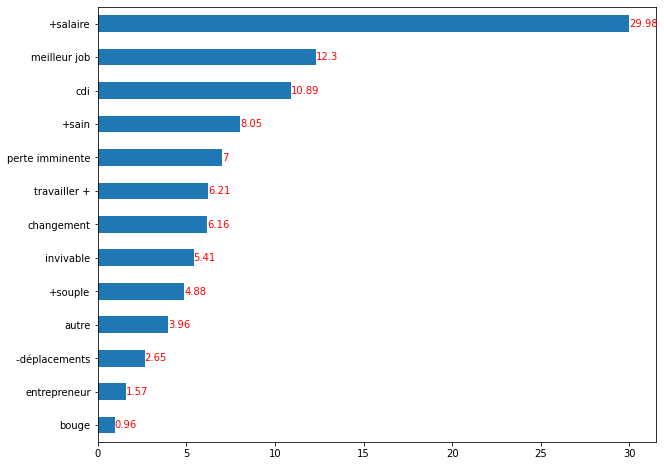

In [337]:
ax= reason.value_counts(normalize=True).mul(100).round(2).sort_values().plot(kind='barh', figsize=(10, 8),)
for c in ax.containers:
    ax.bar_label(c, label_type='edge',color='red')
plt.show()

Need or wants to move                                                                           216
Want to be a freelance                                                                          354
Wants to reduce transport time                                                                  598
Need more suitable or flexible hourly rhythm                                                   1102
Finds the work atmosphere bad, conflicting work relations                                      1223
Wants to change of job or activity sector                                                      1392
Wants to work more hours                                                                       1404
Risk of losing or gonna lose current job                                                       1582
Need to work with conditions that are less strenuous or more adapted to his or her health      1820
Wants a CDI                                                                                    2462


* Calculate the sum of all features without ```Unknow```

The sum of all feature without Unknow is: 21707


- Calculate the repartition of each feature

,Feature,Percentage
11,Wants to increase salary,31.21
10,Wants a more interesting job,12.80
9,Wants a CDI,11.34
8,Need to work with conditions that are less str...,8.38
7,Risk of losing or gonna lose current job,7.29
6,Wants to work more hours,6.47
5,Wants to change of job or activity sector,6.41
4,"Finds the work atmosphere bad, conflicting wor...",5.63
3,Need more suitable or flexible hourly rhythm,5.08
2,Wants to reduce transport time,2.75


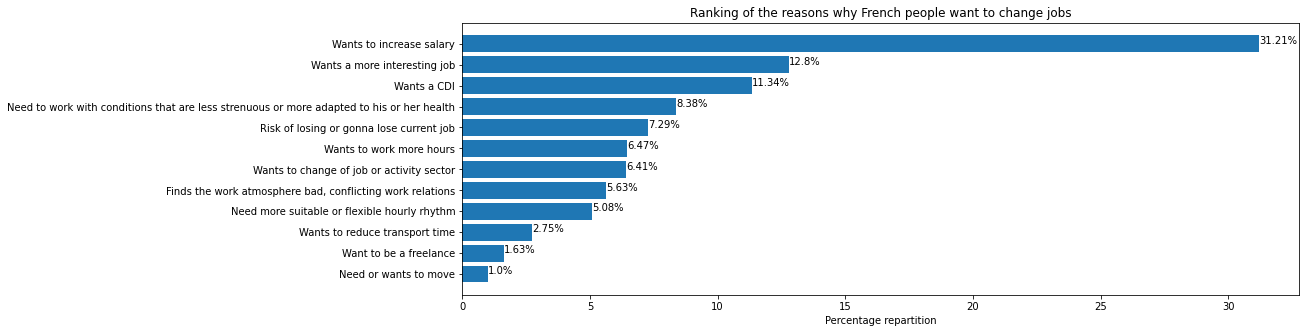

## OPTIONNAL

* Let's end this exercise by looking at the distribution of desired hours for those looking for part-time work. To do this, use the HREC column. 

  * First try to simply create a histogram without the density function. 
  * To create the density function, you will need to use the following formula: 
      ```y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))```
     
     where *mu* is the mean of the distribution and *sigma* is the standard deviation.  
     
You can help yourself with this tutorial <a href="https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html" target="_blank">histogram with Density</a>

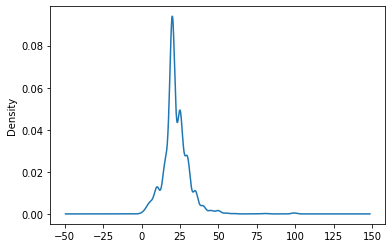

In [8]:
# p1=df['HREC'].plot(kind='hist', bins=15, )
p2=df['HREC'].plot.kde()

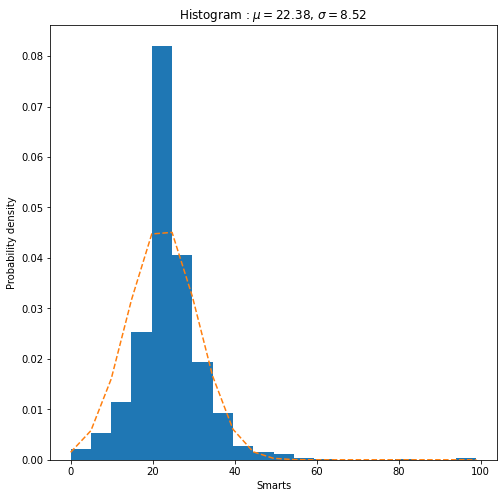